In [2]:
!pip install --upgrade pytesseract wget

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built pytesseract wget


In [3]:
import pytesseract
import matplotlib.pyplot as plt
import os
import glob
import cv2

In [4]:
import wget,zipfile,os
filename = "license-plates"

if not os.path.isfile(filename):
    filename = wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/license-plates.zip")
    with zipfile.ZipFile("license-plates.zip",'r') as zip_ref:
        zip_ref.extractall()

In [5]:
path_for_license_plates = os.getcwd() + "/license-plates/**/*.jpg"
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive=True):
    
    license_plate_file = path_to_license_plate.split("/")[-1]
    license_plate, _ = os.path.splitext(license_plate_file)
    '''
    Here we append the actual license plate to a list
    '''
    list_license_plates.append(license_plate)
    
    '''
    Read each license plate image file using openCV
    '''
    img = cv2.imread(path_to_license_plate)
    
    '''
    We then pass each license plate image file to the Tesseract OCR engine using 
    the Python library wrapper for it. We get back a predicted_result for the license plate.
    We append the predicted_result in a list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img, lang='eng',
    config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
    predicted_license_plates.append(filter_predicted_result)

In [6]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
    for actual_plate, predict_plate in zip(actual_list, predicted_list):
        accuracy = "0%"
        num_matches = 0
        if actual_plate == predict_plate:
            accuracy = "100%"
        else:
            if len(actual_plate) == len(predict_plate):
                for a, p in zip(actual_plate, predict_plate):
                    if a == p:
                        num_matches += 1
                accuracy = str(round((num_matches/len(actual_plate)), 2) * 100)
                accuracy += "%"
        print("     ", actual_plate, "\t\t\t", predict_plate, "\t\t  ", accuracy)

        
calculate_predicted_accuracy(list_license_plates, predicted_license_plates)

Actual License Plate 	 Predicted License Plate 	 Accuracy
-------------------- 	 ----------------------- 	 --------
      OCX4764 			 OCX4764 		   100%
      OKS0078 			 OKS0078 		   100%
      PJG0783 			 PJG0783 		   100%
      OKV8004 			 QKV8004 		   86.0%
      ODJ1599 			 ODJ1599 		   100%
      OYJ9557 			 OYJ9557 		   100%
      PJB2414 			 PJB2414 		   100%
      OLA1208 			 OLA1208 		   100%
      OUP9563 			 OUP9563 		   100%
      AYO9034 			 AYO9034 		   100%
      PJD2685 			 PJD2685 		   100%
      OLC4728 			 OLC4728 		   100%
      NZW2197 			 NZW2197 		   100%
      PJB7392 			 PJB7392 		   100%
      NYY1710 			 NYY1710 		   100%
      NTK5785 			 NTK5785 		   100%
      GWT2180 			 GWT2120 		   86.0%
      JSQ1413 			 JSQ|413 		   86.0%


Text(0.5, 1.0, 'GWT2180 license plate')

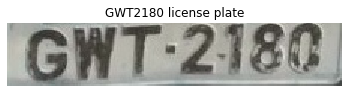

In [7]:
#read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd()+"/license-plates/GWT2180.jpg")
plt.imshow(test_license_plate)
plt.axis("off")
plt.title("GWT2180 license plate")

In [8]:
resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2,fy=2,interpolation=cv2.INTER_CUBIC)

In [10]:
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate,cv2.COLOR_BGR2GRAY)

In [18]:
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate,(5,5),0)

In [19]:
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng',
config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)

GWT2180
